In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Caricamento e gestione del dataset sulla fertilità
fertility_ds = pd.read_csv('../../resources/fertility_rate.csv', delimiter=';')
fertility_ds = fertility_ds.filter(items=['Country or Area', 'Year(s)', 'Value'])
fertility_ds = fertility_ds[fertility_ds['Year(s)'] >= 1999]
fertility_ds

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2023,3.5252
1,ADB region: Central and West Asia,2022,3.5636
2,ADB region: Central and West Asia,2021,3.6138
3,ADB region: Central and West Asia,2020,3.6272
4,ADB region: Central and West Asia,2019,3.6371
...,...,...,...
18856,Zimbabwe,2003,3.8622
18857,Zimbabwe,2002,3.9249
18858,Zimbabwe,2001,3.9832
18859,Zimbabwe,2000,4.0088


In [81]:
fertility_ds_continents = fertility_ds[(fertility_ds['Country or Area'] == 'Asia') | (fertility_ds['Country or Area'] == 'Africa') | (fertility_ds['Country or Area'] == 'Europe') | (fertility_ds['Country or Area'] == 'Northern America') | (fertility_ds['Country or Area'] == 'South America') | (fertility_ds['Country or Area'] == 'Oceania')]
fertility_ds_continents

,Country or Area,Year(s),Value
238,Africa,2023,4.0718
239,Africa,2022,4.1247
240,Africa,2021,4.1794
241,Africa,2020,4.2423
242,Africa,2019,4.3122
...,...,...,...
15456,South America,2003,2.2821
15457,South America,2002,2.3419
15458,South America,2001,2.4063
15459,South America,2000,2.4783


In [82]:
fertility_ds_continents['Country or Area'].unique()

array(['Africa', 'Asia', 'Europe', 'Northern America', 'Oceania',
       'South America'], dtype=object)

Iniziamo con il fare una comparazione fra il 1999 ed il 2023 sulla variazione della fertilità a seconda del continente:

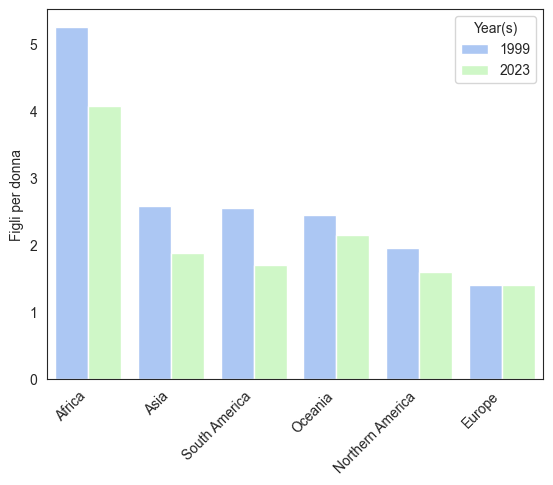

In [83]:
fertility_ds_continents_99and23 = fertility_ds_continents[(fertility_ds_continents['Year(s)'] == 1999) | (fertility_ds_continents['Year(s)'] == 2023)].sort_values(by='Value', ascending=False)
ax = sns.barplot(
    data=fertility_ds_continents_99and23,
    x='Country or Area',
    y='Value',
    hue='Year(s)',
    palette={1999: '#A0C4FF', 2023: '#CAFFBF'}
)
ax.set(xlabel=None)
plt.xticks(rotation=45, ha='right')
ax.set(ylabel='Figli per donna')
plt.show()

In [84]:
hdi = pd.read_csv('../../resources/human_development_index.csv', delimiter=';')
hdi

,Country,1990,2000,2010,2015,2019,2020,2021,2022
0,Switzerland,"0,850","0,885","0,940","0,952","0,960","0,957","0,965","0,967"
1,Norway,"0,845","0,914","0,938","0,952","0,961","0,963","0,964","0,966"
2,Iceland,"0,834","0,895","0,927","0,948","0,958","0,955","0,957","0,959"
3,"Hong Kong, China (SAR)","0,739","0,831","0,914","0,936","0,953","0,955","0,959","0,956"
4,Denmark,"0,839","0,890","0,913","0,936","0,946","0,946","0,947","0,952"
...,...,...,...,...,...,...,...,...,...
189,Niger,"0,212","0,260","0,336","0,367","0,390","0,391","0,389","0,394"
190,Central African Republic,"0,333","0,319","0,357","0,367","0,391","0,389","0,387","0,387"
191,South Sudan,..,..,"0,406","0,381","0,391","0,386","0,381","0,381"
192,Somalia,..,..,..,..,..,..,..,"0,380"


In [85]:
hdi_10years = hdi.filter(items=['Country', '1990', '2000', '2010', '2020'])
hdi_10years = pd.melt(hdi_10years, id_vars='Country', value_vars=['1990', '2000', '2010', '2020'], var_name='Year', value_name='Value')
hdi_10years

,Country,Year,Value
0,Switzerland,1990,"0,850"
1,Norway,1990,"0,845"
2,Iceland,1990,"0,834"
3,"Hong Kong, China (SAR)",1990,"0,739"
4,Denmark,1990,"0,839"
...,...,...,...
771,Niger,2020,"0,391"
772,Central African Republic,2020,"0,389"
773,South Sudan,2020,"0,386"
774,Somalia,2020,..


Trend del Human Index Development in Europa (campione preso osservando Italia, Francia, UK, Grecia, Spagna e Germania):

C:\Users\paioc\AppData\Local\Temp\ipykernel_8348\1415293264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)


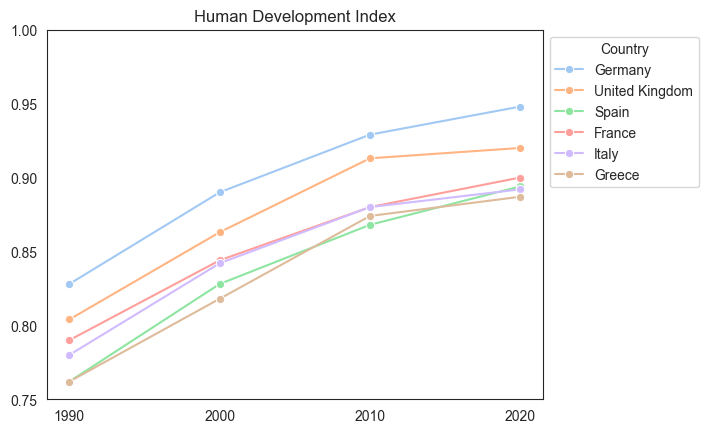

In [86]:
def convert_to_float(value: str) -> float:
    try:
        return float(value.replace(',', '.'))
    except ValueError:
        return float('nan')

hdi_10years_europe = hdi_10years[(hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'France') | (hdi_10years['Country'] == 'Germany') | (hdi_10years['Country'] == 'Spain') | (hdi_10years['Country'] == 'United Kingdom') | (hdi_10years['Country'] == 'Greece')]
hdi_10years_europe['Value'] = hdi_10years_europe['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_europe,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(.75, 1.01, .05))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Osservazione del HDI con alcuni casi specifici in vari continenti:

C:\Users\paioc\AppData\Local\Temp\ipykernel_8348\3078348177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)


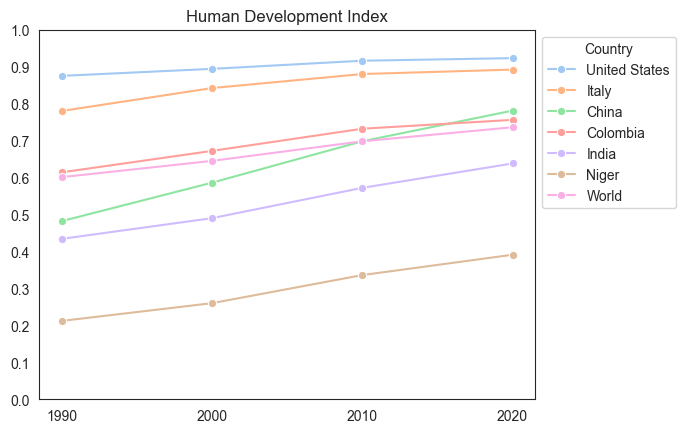

In [87]:
hdi_10years_mixed = hdi_10years[(hdi_10years['Country'] == 'China') | (hdi_10years['Country'] == 'India') | (hdi_10years['Country'] == 'Niger') | (hdi_10years['Country'] == 'Colombia') | (hdi_10years['Country'] == 'United States') | (hdi_10years['Country'] == 'Italy') | (hdi_10years['Country'] == 'World')]
hdi_10years_mixed['Value'] = hdi_10years_mixed['Value'].apply(convert_to_float)
ax = sns.lineplot(
    data=hdi_10years_mixed,
    x='Year',
    y='Value',
    hue='Country',
    palette='pastel',
    marker='o'
)
ax.set_title('Human Development Index')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_yticks(np.arange(0, 1.01, .1))
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
plt.show()

Correlazione fra fertilità e HDI in alcuni stati:

C:\Users\paioc\AppData\Local\Temp\ipykernel_8348\1055558263.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_italy['Value'] = hdi_10years_italy['Value'].apply(convert_to_float)


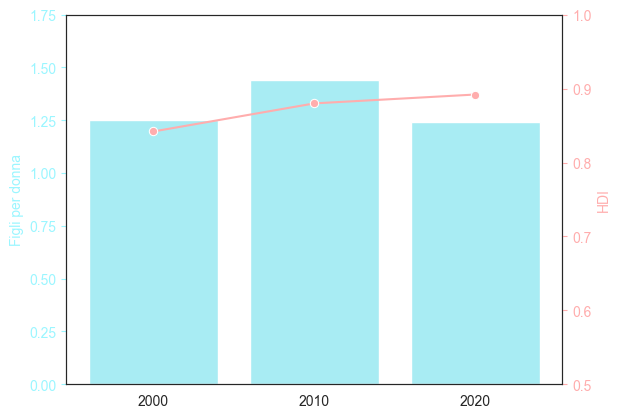

In [113]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_italy_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'Italy') & ((fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_italy_90to20,
    x='Year(s)',
    y='Value',
    color='#9BF6FF'
)
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#9BF6FF')
ax1.set_yticks(np.arange(0, 1.81, .25))
ax1.tick_params(axis='y', colors='#9BF6FF')

ax2 = ax1.twinx()

hdi_10years_italy = hdi_10years[(hdi_10years['Country'] == 'Italy') & (hdi_10years['Year'] != '1990')]
hdi_10years_italy['Value'] = hdi_10years_italy['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_italy,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(.5, 1.01, .1))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()

C:\Users\paioc\AppData\Local\Temp\ipykernel_8348\1493367226.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_10years_india['Value'] = hdi_10years_india['Value'].apply(convert_to_float)


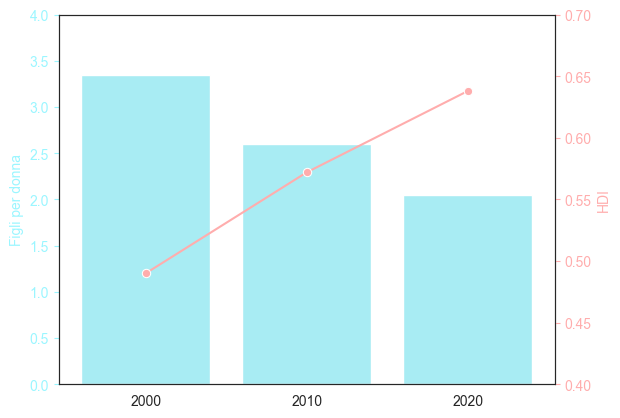

In [114]:
sns.set_style('white')
fig, ax1, = plt.subplots()

fertility_ds_india_90to20 = fertility_ds[(fertility_ds['Country or Area'] == 'India') & ((fertility_ds['Year(s)'] == 2000) | (fertility_ds['Year(s)'] == 2010) | (fertility_ds['Year(s)'] == 2020))]
sns.barplot(
    data=fertility_ds_india_90to20,
    x='Year(s)',
    y='Value',
    color='#9BF6FF'
)
ax1.set(xlabel=None)
ax1.set_ylabel('Figli per donna', color='#9BF6FF')
ax1.set_yticks(np.arange(0, 4.1, .5))
ax1.tick_params(axis='y', colors='#9BF6FF')

ax2 = ax1.twinx()

hdi_10years_india = hdi_10years[(hdi_10years['Country'] == 'India') & (hdi_10years['Year'] != '1990')]
hdi_10years_india['Value'] = hdi_10years_india['Value'].apply(convert_to_float)
sns.lineplot(
    data=hdi_10years_india,
    x='Year',
    y='Value',
    marker='o',
    ax=ax2,
    color='#FFADAD'
)
ax2.set_ylabel('HDI', color='#FFADAD')
ax2.set_yticks(np.arange(.4, .71, .05))
ax2.tick_params(axis='y', colors='#FFADAD')

plt.show()